<a href="https://colab.research.google.com/github/gkjunior/machine_learning_sklearn_keras_tf2/blob/main/00_Zweite_erste_schritte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Die Anfänge:
# wieder mit Housing. Als erstes ein working directory anlegen und das file downloaden.

#### ZielVar wird der mittlere Hauswert sein.


import os
import tarfile
import urllib.request
import glob

print(os.getcwd() +' :'+ str('GoogleColab-Home-Verzeichnis'))

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Funtion zum fetchen der URL:

def fetch_url(url_file = HOUSING_URL, path_file = HOUSING_PATH):
  """
  Funktion zum abgreifen von Files aus dem Github
  Erstellt wenn nötig das Verzeichnis und entpackt das file drin.
  """
  os.makedirs(path_file, exist_ok = True)
  tgz_path = os.path.join(path_file, "housing.tgz")
  urllib.request.urlretrieve(url_file, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = path_file)
  housing_tgz.close()
  print(f"Datei entpackt in {glob.glob(tgz_path)}")

fetch_url()


/content :GoogleColab-Home-Verzeichnis
Datei entpackt in ['datasets/housing/housing.tgz']


In [3]:
# Das File reinladen und kurz analysieren

import pandas as pd

housing = pd.read_csv(HOUSING_PATH + str("/housing.csv"))
print(housing.head(10))
print() #Platzhalter
print(len(housing)) # Einträge

# Ocean proximity ist klasse?
# genauer ins Set gucken

   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY
5    -122.25     37.85  ...            269700.0         NEAR BAY
6    -122.25     37.84  ...            299200.0         NEAR BAY
7    -122.25     37.84  ...            241400.0         NEAR BAY
8    -122.26     37.84  ...            226700.0         NEAR BAY
9    -122.25     37.84  ...            261100.0         NEAR BAY

[10 rows x 10 columns]

20640


In [4]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing['ocean_proximity'].value_counts()

# Kat Merkmal mit 5 Ausprägungen

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.info()

## total bedrooms hat weniger Einträge: Genauer angucken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


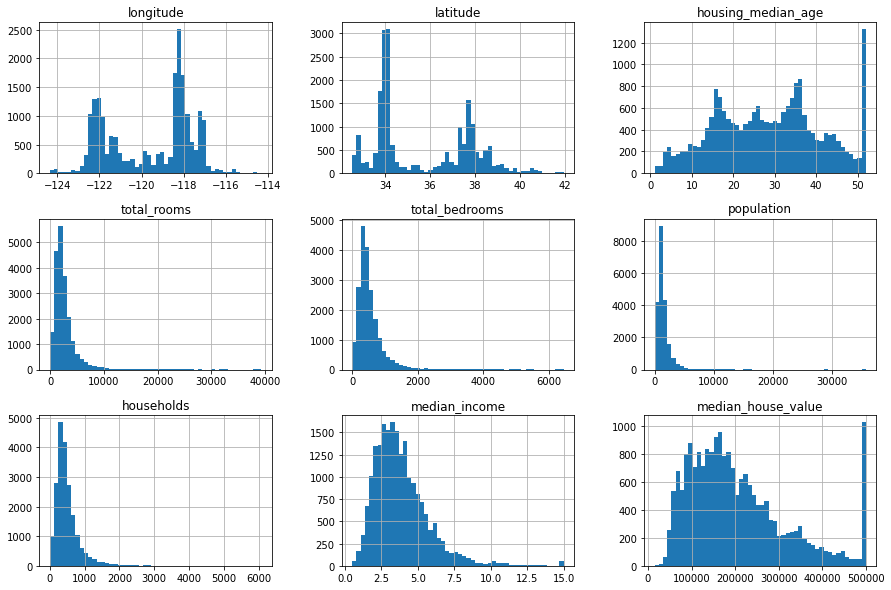

In [8]:
# plotten
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize= (15,10)) # leserlich auf chromebook
plt.show()

In [9]:
# Kleine Notes:

# long und lat daten: Könnte man ja eigentlich plotten um eine tatsächliche Karte darzustellen? eventl. heatmap
# Housing Median Age genauer anschauen, da Bezirksdaten.
# total_rooms, total_bedrooms, pop, households, median_income, median_house_value -> rechtsschief: eventl log-transfo/boxcox/Yeo - je nachdem im Detail.
# die ersten 3 sind multimodal, da stecken mit sicherheit eigene Klassen drin. Macht auch Sinn, da Regionsinfo in Long und Lat und Altersklassen.
# Median Income hat unheimlich niedrige Werte. Im Buch wird sicher noch herauskommen, dass eine 3 nicht für 3$ sondern wahrscheinlich eine Tk Transformation ist.
# Generell müssen die Wertebereiche skaliert werden, sie gehen von 0 - 500k.

# // Edit Buch: Jap, Income steht für x*10.000


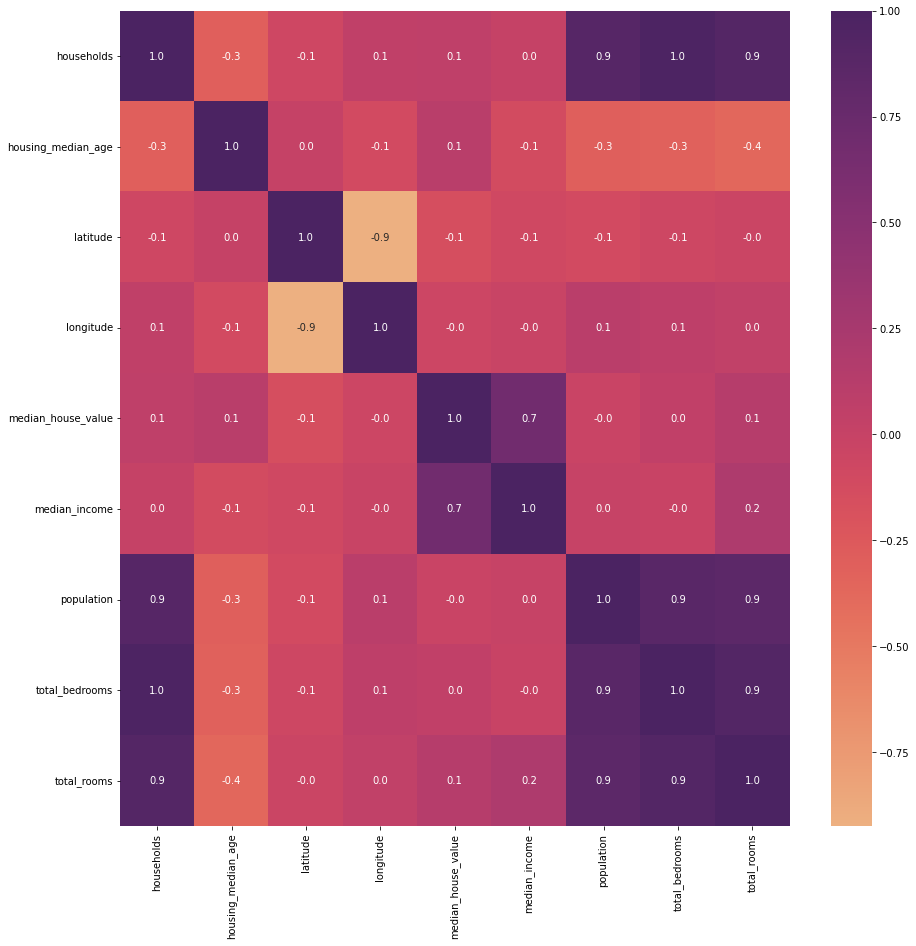

In [10]:
# Multicolin check:

import seaborn as sns

cat_vars = []
for col, value in housing.iteritems():
    if value.dtype == 'object':
        cat_vars.append(col)

df_cat = housing[cat_vars]
# Store the numerical columns in a list numerical
numerical = housing.columns.difference(cat_vars)

#print("\n numerical:" , numerical)
df_num= housing[numerical]
# df_cat.head(
plt.figure(figsize=(15,15))
sns.heatmap(df_num.corr(),annot=True ,cmap='flare',fmt= '.1f')
plt.show()

In [11]:
# Schön wenn Ziel Median_House_value sein soll, ist dort eine geringe Korrelation zu finden.
# Dafür wird es probleme zwischen households, pop, total_bedrooms und total rooms geben.
# Schauen wir mal mit scaling und transformation was wir verbessern können, dennoch die multicolin der o.g. vars im Auge behalten.
# Einmal den VIF kalken: (Varianz-Inflations-Faktor):

In [12]:
# VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# datenset ohne ocean; long;lat erstellen:
temp_df = housing.iloc[:,2:-1]

# schnell NAs rausnehmen:
temp_df = temp_df.dropna()

# Vif erstellen:

vif_df = pd.DataFrame()
vif_df['Features'] = temp_df.columns

# VIF für jedese feature
vif_df["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]
  
print(vif_df)

             Features        VIF
0  housing_median_age   3.832552
1         total_rooms  27.837373
2      total_bedrooms  86.897971
3          population  16.458232
4          households  91.808986
5       median_income  10.738275
6  median_house_value   9.524916


In [ ]:
# households und bedrooms werden probleme machen. Später schauen, je nachdem welches Modell ob Stepwise entfernt werden soll oder vorher.
# Darüber hinaus auch nochmal Varian prüfen - generell nzv entfernen.

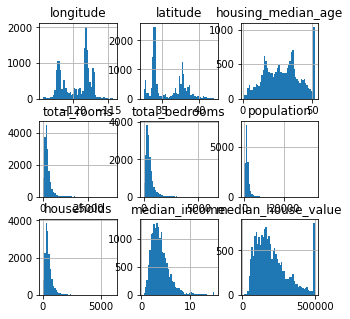

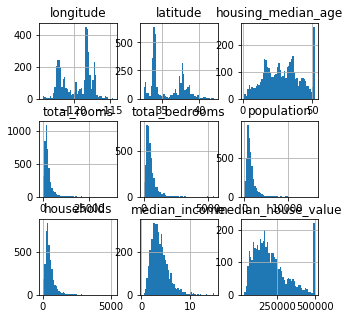

In [18]:
##### Gehen wir tiefer:

# Testdatensatz erstellen und genauer reingucken:

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

%matplotlib inline
train_set.hist(bins = 50, figsize= (5,5))
test_set.hist(bins = 50, figsize= (5,5))
plt.show()


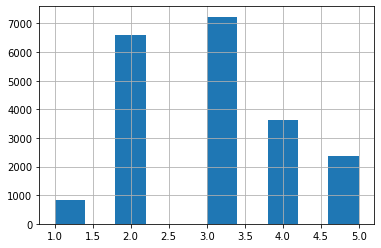

In [20]:
# Verteilung sieht gut aus aber nicht stratifiziert : daher vorher stratifizieren:
# Buch sagt:
# Kategorien anhand des Median_incomes erstellen, Klassieren nach 1-5: min 1; max 5
# dazu ein groupby describe auf den median income um sich die Werte besser anzugucken.
# Dann ein stratset bilden und die verteilung prüfen:


housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels = [1,2,3,4,5])

housing["income_cat"].hist()



In [40]:
# Anteile:
housing["income_cat"].value_counts()/ len(housing["income_cat"])


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [32]:
housing.groupby(["income_cat"]).describe().loc[:,['median_income']]

median_income                      ...                            
                   count      mean       std  ...      50%       75%      max
income_cat                                    ...                            
1                  822.0  1.211262  0.236404  ...  1.26295  1.402175   1.5000
2                 6581.0  2.325457  0.406612  ...  2.34820  2.664800   3.0000
3                 7236.0  3.686134  0.426957  ...  3.66070  4.050725   4.5000
4                 3639.0  5.132392  0.410946  ...  5.09230  5.462350   6.0000
5                 2362.0  7.722912  1.931465  ...  7.03275  8.242750  15.0001

[5 rows x 8 columns]

In [34]:
### STRAT Sample ziehen:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1234)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [37]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# Anteile der Einkommenskategorien:

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [42]:
# Verteilung okay, entfernen der neuen Spalte:

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis = 1, inplace = True)

In [43]:
# -- LEER --

In [44]:
# Kopie des Strat_train Sets erstellen für später:

housing_train = strat_train_set.copy()

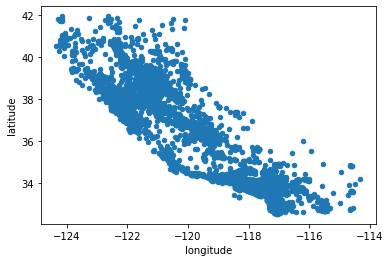

In [48]:
# Visualisieren von geografischen Daten: (nachfolgend basics)

# Mit Längen- und breitengrad:

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude')

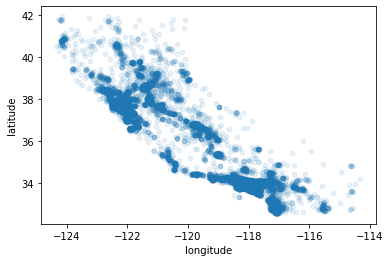

In [49]:
# das sieht nach californien aus.
# alpha auf 0.1 setzen um dichte zu erkennen:

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.1)
# entspricht darstellung von gebieten mit hoher dichte.

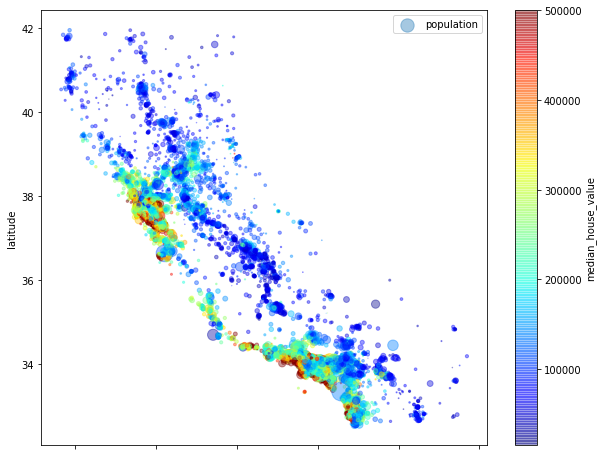

In [52]:
# Gut zu erkennen: Eureka oben links die Ecke, SF im mittleren Bereich, unten im süden dann LA und San Diego(?) 
# Hinzufügen der Immobilienpreise:
  # Radius eines Kreises = Bevölkerung eines Bizirks.
  # Farbe entspricht preis von Blau = min : Rot = max.

housing_train.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.4,
             s = housing_train["population"]/100, label = "population", figsize = (10,8),
             c = "median_house_value", cmap = 'jet', colorbar = True)
plt.legend()

In [ ]:
# yaa, jeder liebt die küste.